In [1]:
import pandas as pd
from datetime import datetime
df = pd.read_csv('../scrapers/facebook/data/Manchester_City_1619_fb.csv', dtype={'post_id':str})

In [2]:
df.head()

,post_id,text,time,shared_text,likes,comments,shares,post_url,link,like,love,wow,haha,sorry,anger,w3_fb_url
0,10163897360370455,IF WE FOLLOW THE GAME PLAN WE WILL GET THROUGH...,2020-03-30 14:15:23,NaN,5801,267,0,https://m.facebook.com/story.php?story_fbid=10...,http://mancity.com/cityzensathome,5801,817,13,11,4,9,NaN
1,10164012090975455,We asked our players to name their favourite g...,2020-04-17 14:00:01,NaN,686,27,0,https://m.facebook.com/story.php?story_fbid=10...,NaN,687,55,1,1,0,0,NaN
2,10164011702550455,Samir was IMMENSE that day!\nRevisiting our 8-...,2020-04-17 12:00:00,NaN,985,21,0,https://m.facebook.com/story.php?story_fbid=10...,NaN,985,119,1,8,1,0,NaN
3,10164011741035455,Classic Carlos! 🔥,2020-04-17 10:00:01,NaN,4179,65,0,https://m.facebook.com/story.php?story_fbid=10...,NaN,4179,522,19,5,1,1,NaN
4,10164005639920455,🏆 DRINKING IT IN 🏆\nPost 93:20 euphoria and pl...,2020-04-16 22:00:34,NaN,2704,64,0,https://m.facebook.com/story.php?story_fbid=10...,https://youtu.be/-vS4l1HJb8A,2704,370,10,3,1,1,NaN


In [3]:
res = df[['time','comments','like','love','wow','haha','sorry','anger']]
res.head()

,time,comments,like,love,wow,haha,sorry,anger
0,2020-03-30 14:15:23,267,5801,817,13,11,4,9
1,2020-04-17 14:00:01,27,687,55,1,1,0,0
2,2020-04-17 12:00:00,21,985,119,1,8,1,0
3,2020-04-17 10:00:01,65,4179,522,19,5,1,1
4,2020-04-16 22:00:34,64,2704,370,10,3,1,1


In [4]:
ind = []
for i,x in zip(res.index, res.time):
    if len(str(x))<4:
        ind.append(i)

In [5]:
res=res.drop(ind).reset_index(drop=True)

In [6]:
day = []
for x in res['time']:
    d = datetime.strptime(str(x), '%Y-%m-%d %H:%M:%S')
    day.append(d)

In [7]:
res['day'] = day

In [8]:
res = res.drop(['time'], axis=1).sort_values(by=['day']).reset_index(drop=True)

In [9]:
res.head()

,comments,like,love,wow,haha,sorry,anger,day
0,54,4126,75,5,28,0,1,2016-08-04 20:02:00
1,345,16000,253,62,91,1,5,2016-08-05 16:00:01
2,70,11658,149,16,49,2,0,2016-08-06 01:02:00
3,109,10685,144,12,44,5,9,2016-08-06 13:02:00
4,2043,15936,1714,152,205,45,113,2016-08-06 15:17:09


In [10]:
datetime_str = '2018-08-07 13:55:26'
start_date = datetime.strptime(datetime_str, '%Y-%m-%d %H:%M:%S')
datetime_str = '2019-05-20 13:55:26'
end_date = datetime.strptime(datetime_str, '%Y-%m-%d %H:%M:%S')

In [11]:
x = res[(res.day>start_date) & (res.day<end_date)].reset_index(drop=True)

In [12]:
x.head()

,comments,like,love,wow,haha,sorry,anger,day
0,2958,56970,2619,123,15049,54,55,2018-08-07 14:54:57
1,44,7433,311,70,8,4,4,2018-08-07 20:02:00
2,70,6252,586,39,8,3,2,2018-08-08 18:01:01
3,49,5735,262,33,16,6,1,2018-08-10 12:55:02
4,70,5738,499,39,7,2,2,2018-08-10 16:00:02


In [13]:
x.day = x.day.astype(str)

In [14]:
x['day'] = [x[0] for x in x.day.str.split(' ')]
x.head()

,comments,like,love,wow,haha,sorry,anger,day
0,2958,56970,2619,123,15049,54,55,2018-08-07
1,44,7433,311,70,8,4,4,2018-08-07
2,70,6252,586,39,8,3,2,2018-08-08
3,49,5735,262,33,16,6,1,2018-08-10
4,70,5738,499,39,7,2,2,2018-08-10


In [15]:
x = pd.DataFrame(x.groupby(['day']).mean())
x.head()

,comments,like,love,wow,haha,sorry,anger
day,,,,,,,
2018-08-07,1501.0,32201.5,1465.0,96.5,7528.5,29.0,29.5
2018-08-08,70.0,6252.0,586.0,39.0,8.0,3.0,2.0
2018-08-10,59.5,5736.5,380.5,36.0,11.5,4.0,1.5
2018-08-11,55.0,3891.5,184.5,31.5,9.0,2.0,1.0
2018-08-12,15.0,2797.0,94.0,4.0,1.0,12.0,0.0


In [16]:
def normalize(v):
    res_vec = []
    vec_min, vec_max = min(v), max(v)
    den = vec_max-vec_min
    for el in v:
        res_vec.append((el-vec_min)/den)
    return res_vec

In [17]:
x.like = normalize(x.like)
x.love = normalize(x.love)
x.wow = normalize(x.wow)
x.haha = normalize(x.haha)
x.sorry = normalize(x.sorry)
x.anger = normalize(x.anger)

In [18]:
x.head()

,comments,like,love,wow,haha,sorry,anger
day,,,,,,,
2018-08-07,1501.0,0.565991,0.187340,0.132555,1.000000,0.004727,0.013342
2018-08-08,70.0,0.109889,0.074936,0.053571,0.001063,0.000489,0.000905
2018-08-10,59.5,0.100828,0.048657,0.049451,0.001528,0.000652,0.000678
2018-08-11,55.0,0.068399,0.023593,0.043269,0.001195,0.000326,0.000452
2018-08-12,15.0,0.049162,0.012020,0.005495,0.000133,0.001956,0.000000


In [19]:
def transform_df(df, start_date_str, end_date_str, normalize=True):
    
    def normalize(v):
        res_vec = []
        vec_min, vec_max = min(v), max(v)
        den = vec_max-vec_min
        for el in v:
            res_vec.append((el-vec_min)/den)
        return res_vec
    
    new_df = df[['time','comments','like','love','wow','haha','sorry','anger']]
    ind = []
    for i,x in zip(new_df.index, new_df.time):
        if len(str(x)) < 4: #remove missing dates
            ind.append(i)
    new_df=new_df.drop(ind).reset_index(drop=True)
    day = []
    for x in new_df['time']:
        d = datetime.strptime(str(x), '%Y-%m-%d %H:%M:%S')
        day.append(d)
    new_df['day'] = day
    new_df = new_df.drop(['time'], axis=1).sort_values(by=['day']).reset_index(drop=True)
    start_date = datetime.strptime(start_date_str, '%Y-%m-%d %H:%M:%S')
    end_date = datetime.strptime(end_date_str, '%Y-%m-%d %H:%M:%S')
    new_df = new_df[(new_df.day>start_date) & (new_df.day<end_date)].reset_index(drop=True)
    new_df.day = new_df.day.astype(str) # cast to str to split
    new_df['day'] = [x[0] for x in new_df.day.str.split(' ')]
    new_df = pd.DataFrame(new_df.groupby(['day']).mean())
    if normalize:
        new_df.like = normalize(new_df.like)
        new_df.love = normalize(new_df.love)
        new_df.wow = normalize(new_df.wow)
        new_df.haha = normalize(new_df.haha)
        new_df.sorry = normalize(new_df.sorry)
        new_df.anger = normalize(new_df.anger)
    return new_df

In [33]:
start_date = '2018-08-07 13:55:26'
end_date = '2019-05-20 13:55:26'
transform_df(df, start_date, end_date).head()

,comments,like,love,wow,haha,sorry,anger
day,,,,,,,
2018-08-07,1501.0,0.565991,0.187340,0.132555,1.000000,0.004727,0.013342
2018-08-08,70.0,0.109889,0.074936,0.053571,0.001063,0.000489,0.000905
2018-08-10,59.5,0.100828,0.048657,0.049451,0.001528,0.000652,0.000678
2018-08-11,55.0,0.068399,0.023593,0.043269,0.001195,0.000326,0.000452
2018-08-12,15.0,0.049162,0.012020,0.005495,0.000133,0.001956,0.000000


In [34]:
df_mancity = pd.read_csv('../scrapers/facebook/data/Manchester_City_1619_fb.csv', dtype={'post_id':str})
df_liverpool = pd.read_csv('../scrapers/facebook/data/Liverpool_1619_fb.csv', dtype={'post_id':str})

In [35]:
trans_mancity = transform_df(df_mancity, start_date, end_date)
trans_liverpool = transform_df(df_liverpool, start_date, end_date)

In [36]:
trans_mancity

,comments,like,love,wow,haha,sorry,anger
day,,,,,,,
2018-08-07,1501.000000,0.565991,0.187340,0.132555,1.000000,0.004727,0.013342
2018-08-08,70.000000,0.109889,0.074936,0.053571,0.001063,0.000489,0.000905
2018-08-10,59.500000,0.100828,0.048657,0.049451,0.001528,0.000652,0.000678
2018-08-11,55.000000,0.068399,0.023593,0.043269,0.001195,0.000326,0.000452
2018-08-12,15.000000,0.049162,0.012020,0.005495,0.000133,0.001956,0.000000
2018-08-14,41.500000,0.082698,0.024808,0.050137,0.001262,0.000326,0.001583
2018-08-15,220.500000,0.262910,0.109655,0.081044,0.050010,0.001385,0.003166
2018-08-16,74.000000,0.060305,0.029795,0.013736,0.007970,0.000326,0.001357
2018-08-17,462.000000,0.084819,0.071910,0.039835,0.002834,0.000761,0.002563


In [37]:
trans_mancity.shape

(162, 7)

In [38]:
from datetime import date, timedelta
sdate = date(2018, 8, 7)   # start date
edate = date(2019, 5, 20)   # end date
delta = edate - sdate       # as timedelta
league_days = []
for i in range(delta.days + 1):
    day = sdate + timedelta(days=i)
    league_days.append(str(day))

In [39]:
indexed_df = pd.DataFrame()
indexed_df['day'] = league_days
indexed_df.head()

,day
0,2018-08-07
1,2018-08-08
2,2018-08-09
3,2018-08-10
4,2018-08-11


In [40]:
pd.options.display.max_rows=1000
res = pd.merge(indexed_df, trans_mancity, how='left', left_on=['day'], right_on=['day'])
res = pd.merge(res, trans_liverpool, how='left', left_on=['day'], right_on=['day'])
res

,day,comments_x,like_x,love_x,wow_x,haha_x,sorry_x,anger_x,comments_y,like_y,love_y,wow_y,haha_y,sorry_y,anger_y
0,2018-08-07,1501.000000,0.565991,0.187340,0.132555,1.000000,0.004727,0.013342,645.000000,0.026997,0.030207,0.012880,0.003248,0.001856,0.004472
1,2018-08-08,70.000000,0.109889,0.074936,0.053571,0.001063,0.000489,0.000905,69.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2018-08-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,561.000000,0.098633,0.037070,0.200793,0.018768,0.005776,0.005367
3,2018-08-10,59.500000,0.100828,0.048657,0.049451,0.001528,0.000652,0.000678,70.000000,0.051166,0.027561,0.026420,0.002887,0.000825,0.005367
4,2018-08-11,55.000000,0.068399,0.023593,0.043269,0.001195,0.000326,0.000452,296.000000,0.156487,0.123056,0.095112,0.006497,0.001650,0.009839
5,2018-08-12,15.000000,0.049162,0.012020,0.005495,0.000133,0.001956,0.000000,427.000000,0.166060,0.140704,0.119551,0.011951,0.003163,0.007454
6,2018-08-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2018-08-14,41.500000,0.082698,0.024808,0.050137,0.001262,0.000326,0.001583,400.000000,0.118183,0.071077,0.335535,0.006737,0.003300,0.003578
8,2018-08-15,220.500000,0.262910,0.109655,0.081044,0.050010,0.001385,0.003166,293.500000,0.152380,0.081634,0.049538,0.006256,0.087046,0.008945
9,2018-08-16,74.000000,0.060305,0.029795,0.013736,0.007970,0.000326,0.001357,114.000000,0.118288,0.047815,0.096433,0.005294,0.004125,0.005367


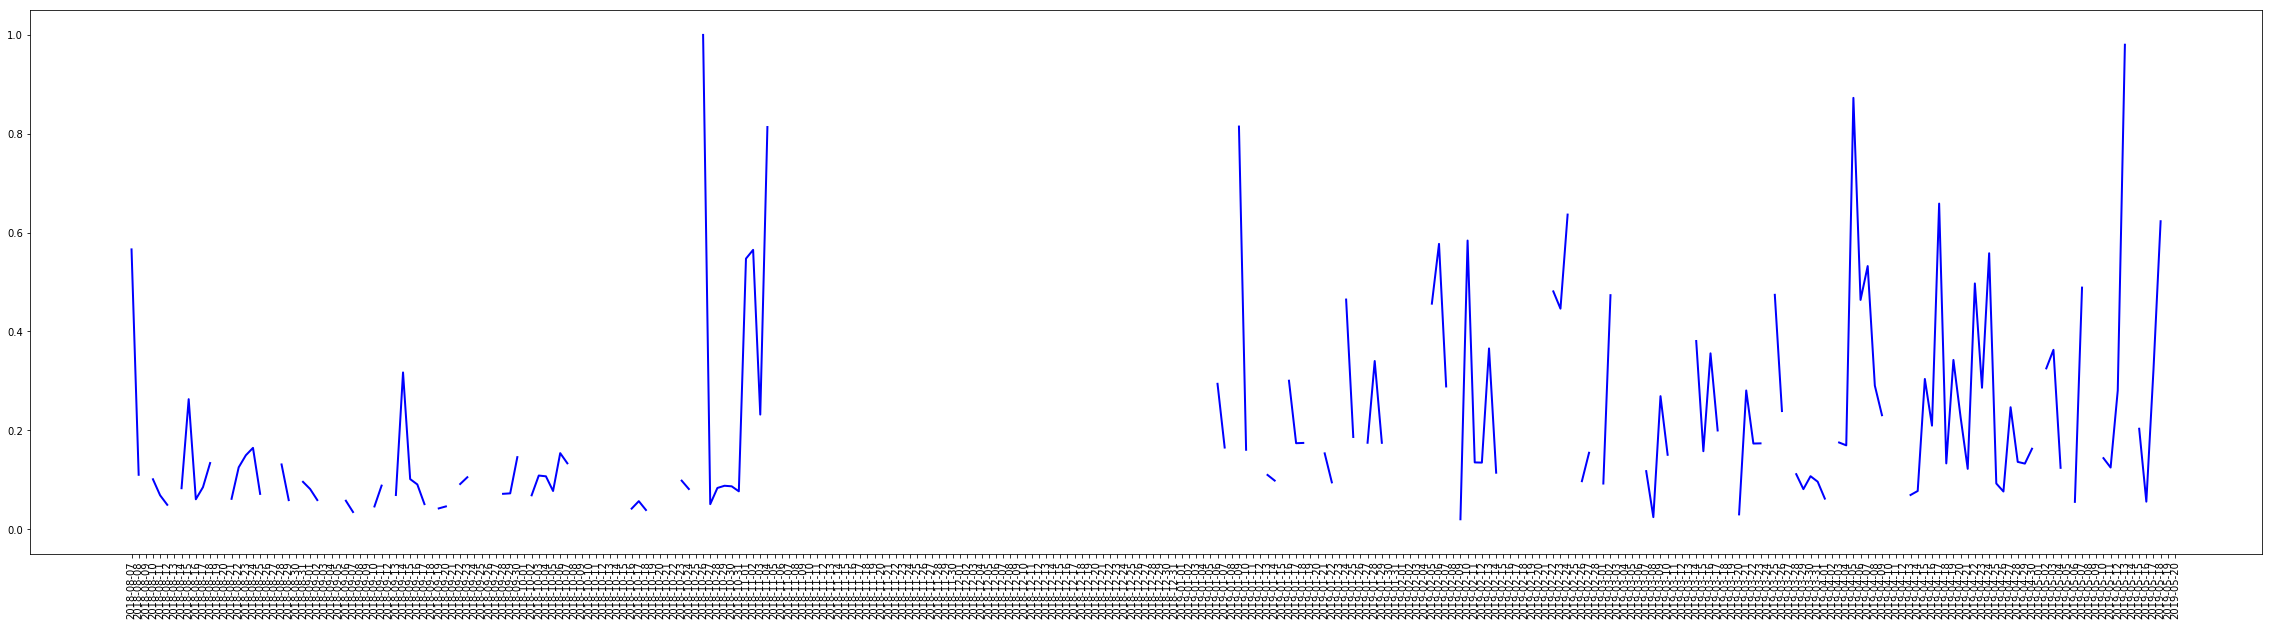

In [41]:
import matplotlib.pyplot as plt
plt.figure(figsize=(40, 10))
plt.xticks(rotation=90)
plt.plot(res.day, res.like_x, marker='o', linewidth=2, markersize=0, color='b')
# plt.plot(res.day, res.like_y, marker='o', linewidth=2, markersize=0, color='r')
# plt.plot(x.index, x.sorry, marker='o', linewidth=2, markersize=0, color='r')
# plt.plot(x.index, x.love, marker='o', linewidth=2, markersize=0, color='b')
# plt.plot(x.index, x.wow, marker='o', linewidth=2, markersize=0, color='y')
plt.show()